<a href="https://colab.research.google.com/github/tensorvijay/Driftscan/blob/master/Galaxy_morphology_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/

/content/drive


In [ ]:
cd ../


/content


In [ ]:
!unzip '/content/drive/My Drive/galaxy/images_test_rev1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images_test_rev1/944051.jpg  
  inflating: images_test_rev1/944064.jpg  
  inflating: images_test_rev1/944073.jpg  
  inflating: images_test_rev1/944075.jpg  
  inflating: images_test_rev1/944076.jpg  
  inflating: images_test_rev1/944077.jpg  
  inflating: images_test_rev1/944085.jpg  
  inflating: images_test_rev1/944088.jpg  
  inflating: images_test_rev1/944094.jpg  
  inflating: images_test_rev1/944102.jpg  
  inflating: images_test_rev1/944104.jpg  
  inflating: images_test_rev1/944114.jpg  
  inflating: images_test_rev1/944133.jpg  
  inflating: images_test_rev1/944139.jpg  
  inflating: images_test_rev1/944142.jpg  
  inflating: images_test_rev1/944147.jpg  
  inflating: images_test_rev1/944152.jpg  
  inflating: images_test_rev1/944153.jpg  
  inflating: images_test_rev1/944155.jpg  
  inflating: images_test_rev1/944207.jpg  
  inflating: images_test_rev1/944214.jpg  
  inflating: images_test_rev1/944221.jpg  
  i

In [ ]:

import glob as glob

files_test= glob.glob('../content/images_test_rev1/*.jpg')


In [ ]:
len(files_test)

79975

In [ ]:
!unzip '/content/drive/My Drive/galaxy/images_training_rev1 (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflati

In [ ]:
files_train= glob.glob('../content/images_training_rev1/*.jpg')

In [ ]:
len(files_train)

61578

In [ ]:
import numpy as np
samples_train = np.random.randint(1,len(files_train)-1,size=3000)

In [ ]:
print(files_train)


In [ ]:
print(np.min(samples_train))

9


In [ ]:
len(samples_train)

3000

In [ ]:
{
    'train':len(files_train),
    'test':len(files_test)
}

{'test': 79975, 'train': 61578}

In [ ]:

y_path = '../content/drive/My Drive/galaxy/training_solutions_rev1.csv'

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    return(x)

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

import PIL.Image as im

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_y = pd.read_csv(y_path,index_col='GalaxyID')

len(train_y)

print(train_y)

          Class1.1  Class1.2  Class1.3  ...  Class11.4  Class11.5  Class11.6
GalaxyID                                ...                                 
100008    0.383147  0.616853  0.000000  ...   0.000000        0.0   0.325512
100023    0.327001  0.663777  0.009222  ...   0.000000        0.0   0.000000
100053    0.765717  0.177352  0.056931  ...   0.000000        0.0   0.000000
100078    0.693377  0.238564  0.068059  ...   0.000000        0.0   0.000000
100090    0.933839  0.000000  0.066161  ...   0.000000        0.0   0.000000
...            ...       ...       ...  ...        ...        ...        ...
999948    0.510379  0.489621  0.000000  ...   0.000000        0.0   0.226257
999950    0.901216  0.098784  0.000000  ...   0.000000        0.0   0.000000
999958    0.202841  0.777376  0.019783  ...   0.000000        0.0   0.072296
999964    0.091000  0.909000  0.000000  ...   0.023065        0.0   0.045334
999967    0.767000  0.140000  0.093000  ...   0.000000        0.0   0.023380

In [ ]:
train = np.array([readImage(files_train[x_train])
                  for x_train in samples_train
                 ])

In [ ]:
train.shape

(3000, 424, 424, 3)

In [ ]:
train[2,:,:,:]

array([[[ 3,  4,  0],
        [ 1,  2,  0],
        [ 0,  1,  0],
        ...,
        [ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3]],

       [[ 8,  9,  4],
        [ 7,  8,  3],
        [ 6,  7,  2],
        ...,
        [ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3]],

       [[10, 11,  6],
        [12, 13,  8],
        [12, 13,  8],
        ...,
        [ 4,  4,  2],
        [ 5,  5,  3],
        [ 6,  6,  4]],

       ...,

       [[ 5,  4,  2],
        [ 6,  5,  3],
        [ 6,  5,  3],
        ...,
        [ 4,  4,  2],
        [ 3,  3,  1],
        [ 2,  2,  0]],

       [[ 3,  2,  0],
        [ 4,  3,  1],
        [ 5,  4,  2],
        ...,
        [ 3,  3,  1],
        [ 2,  2,  0],
        [ 1,  1,  0]],

       [[ 1,  0,  0],
        [ 2,  1,  0],
        [ 4,  3,  1],
        ...,
        [ 2,  2,  0],
        [ 1,  1,  0],
        [ 0,  0,  0]]], dtype=uint8)

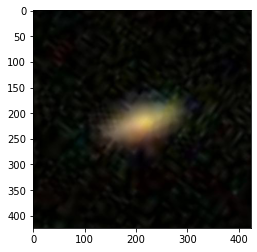

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train[290,:,:,:])

In [ ]:
print(files_train[10].split('/'))
print(files_train[10].split('/')[-1])
print(files_train[10].split('/')[-1].split('.')[0])

['..', 'content', 'images_training_rev1', '829225.jpg']
829225.jpg
829225


In [ ]:
train_y = np.array([train_y.loc[
            np.int64(files_train[galaxy_id].split('/')[-1].split('.')[0]),:]
                    for galaxy_id in samples_train])

In [ ]:
len(train_y)

print(train_y)

train_y.shape

[[0.359241 0.640759 0.       ... 0.       0.       0.      ]
 [0.564087 0.408505 0.027409 ... 0.       0.       0.      ]
 [0.310906 0.674774 0.01432  ... 0.       0.       0.      ]
 ...
 [0.617507 0.342866 0.039628 ... 0.       0.       0.      ]
 [0.747726 0.252274 0.       ... 0.       0.       0.      ]
 [0.82962  0.141845 0.028535 ... 0.       0.       0.      ]]


(3000, 37)

In [ ]:
x_train = train
print('x_train shape:', x_train.shape)

del train

y_train = train_y
print('y_train shape:', y_train.shape)

del train_y

x_train shape: (3000, 424, 424, 3)
y_train shape: (3000, 37)


In [ ]:
shape_kernel = (2,2)
shape_pool = (2,2)

conv_activation = 'relu'
dense_activation = 'relu'


num_classes = len(y_train[0])
epochs = 200

img_rows, img_cols = 424, 424
img_channels = 3

In [ ]:
from keras import backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.layers.core import Flatten, Reshape
from keras.losses import categorical_crossentropy
from keras import metrics

model = Sequential()

model.add(Conv2D(filters=35,
                 kernel_size=shape_kernel,
                 input_shape=(img_rows, img_cols, img_channels),
                 data_format='channels_last',
                 name='Conv-Input',
                 activation = conv_activation
                ))

model.add(Conv2D(filters=30,
                 kernel_size=shape_kernel,
                 name='Conv-02',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Conv2D(filters=25,
                 kernel_size=shape_kernel,
                 name='Conv-03',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=20,
                 kernel_size=shape_kernel,
                 name='Conv-04',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=15,
                 kernel_size=shape_kernel,
                 name='Conv-05',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))


model.add(Conv2D(filters=10,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-06',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=15,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-07',
                 activation = conv_activation
                ))


model.add(Conv2D(filters=2,
                 padding='same',
                 kernel_size=shape_kernel,
                 name='Conv-08',
                 activation = conv_activation
                ))
model.add(MaxPooling2D(pool_size=shape_pool
                      ))

model.add(Flatten())

model.add(Dense(
        units=150,
        name='Dense-02',
        activation = dense_activation
    ))


model.add(Dense(
        units=num_classes,
        activation='sigmoid',
        name='Dense-Output'
    ))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv-Input (Conv2D)          (None, 423, 423, 35)      455       
_________________________________________________________________
Conv-02 (Conv2D)             (None, 422, 422, 30)      4230      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 211, 211, 30)      0         
_________________________________________________________________
Conv-03 (Conv2D)             (None, 210, 210, 25)      3025      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 105, 25)      0         
_________________________________________________________________
Conv-04 (Conv2D)             (None, 104, 104, 20)      2020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 52, 52, 20)       

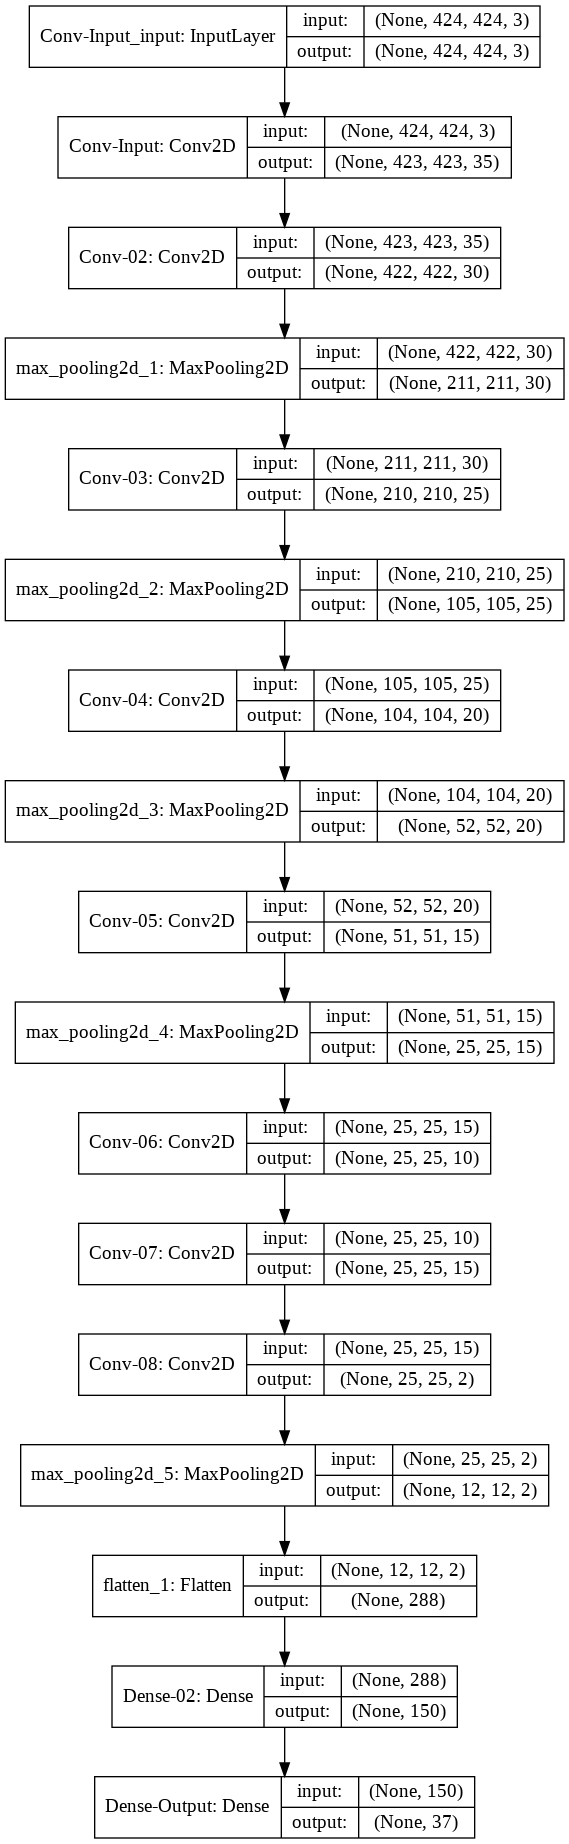

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True,expand_nested=True)

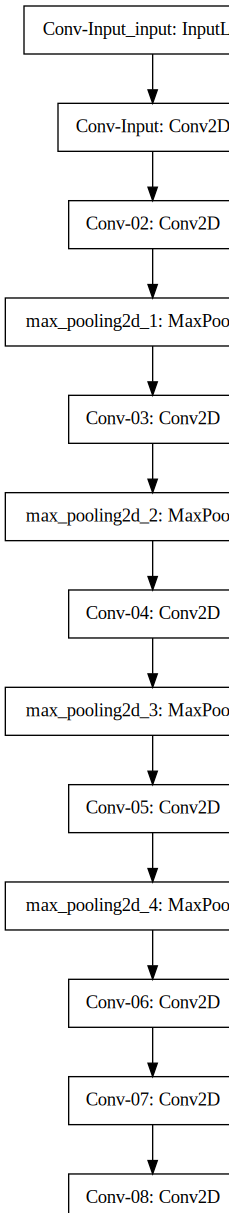

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(lr=0.1),
              metrics = [metrics.cosine])

model.fit(x = x_train-127,
          validation_split=0.1,
          y = y_train,
          batch_size=10,
          epochs=epochs,
          verbose=2)

Train on 2700 samples, validate on 300 samples
Epoch 1/200
 - 145s - loss: 16.2470 - cosine_proximity: 0.7388 - val_loss: 15.3718 - val_cosine_proximity: 0.7931
Epoch 2/200
 - 144s - loss: 15.3117 - cosine_proximity: 0.8074 - val_loss: 15.2505 - val_cosine_proximity: 0.8129
Epoch 3/200
 - 144s - loss: 15.2545 - cosine_proximity: 0.8168 - val_loss: 15.2695 - val_cosine_proximity: 0.8107
Epoch 4/200
 - 144s - loss: 15.2123 - cosine_proximity: 0.8215 - val_loss: 15.2107 - val_cosine_proximity: 0.8227
Epoch 5/200
 - 144s - loss: 15.1735 - cosine_proximity: 0.8254 - val_loss: 15.1760 - val_cosine_proximity: 0.8250
Epoch 6/200
 - 144s - loss: 15.1212 - cosine_proximity: 0.8299 - val_loss: 15.1039 - val_cosine_proximity: 0.8292
Epoch 7/200
 - 144s - loss: 15.0672 - cosine_proximity: 0.8344 - val_loss: 15.0680 - val_cosine_proximity: 0.8333
Epoch 8/200
 - 144s - loss: 15.0140 - cosine_proximity: 0.8388 - val_loss: 15.0593 - val_cosine_proximity: 0.8288
Epoch 9/200
 - 144s - loss: 14.9706 - cos

In [ ]:
print(model)

In [ ]:
def predict_score(file_path,model_name):

    scores = {}
    paths = file_path


    for path in paths:

        path_id = path.split('/')[-1].split('.')[0]
        path_data = np.array([readImage(path)])
        path_score = model_name.predict_proba(path_data,verbose=0)

        scores[path_id] = path_score[0]

        del path_id
        del path_data
        del path_score

    return(scores)

In [ ]:
out = predict_score(file_path=files_test,
                    model_name=model)

In [ ]:
len(out)


In [ ]:
columns = pd.read_csv(y_path,
                      index_col='GalaxyID',
                      nrows=0)

test_results = pd.DataFrame.from_dict(data = out,
                                      orient='index')
test_results.index.name = 'GalaxyID'
test_results.columns = columns.columns

In [ ]:
print(test_results)

In [ ]:
test_results.shape

In [ ]:
F=np.max(test_results,1)

In [ ]:
print(F)

In [ ]:
test_results.shape

In [ ]:
F.shape

In [ ]:
print(y_train)

In [ ]:
y_train.shape

In [ ]:
orig_y = pd.read_csv(y_path,index_col='GalaxyID')

In [ ]:
print(orig_y)

In [ ]:
cp_y='../content/drive/My Drive/galaxy/central_pixel_benchmark.csv'

In [ ]:
orig_y = pd.read_csv(cp_y,index_col='GalaxyID')

In [ ]:
print(orig_y)

In [ ]:
orig_y.shape

In [ ]:
orig_y.head()

In [ ]:
F=np.max(orig_y,1)

In [ ]:
print(F)

In [ ]:
maxValueIndexObj = orig_y.idxmax(axis=1)

In [ ]:
print(maxValueIndexObj)

In [ ]:
maxValueIndexObj.head()

In [ ]:
maxValueIndexObj = test_results.idxmax(axis=1)

In [ ]:
maxValueIndexObj.head()

In [ ]:
out_t = predict_score(file_path=files_train,
                    model_name=model)

In [ ]:
len(out_t)